In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
hbo = pd.read_csv(r'Downloads\HBO_MAX_Content.csv')
hbo.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
hbo.shape

(2087, 75)

In [4]:
hbo.columns

Index(['title', 'type', 'year', 'rating', 'imdb_score', 'rotten_score',
       'decade', 'imdb_bucket', 'genres_Action_Adventure', 'genres_Animation',
       'genres_Anime', 'genres_Biography', 'genres_Children', 'genres_Comedy',
       'genres_Crime', 'genres_Cult', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_Food', 'genres_Game Show',
       'genres_History', 'genres_Home_Garden', 'genres_Horror',
       'genres_Independent', 'genres_LGBTQ', 'genres_Musical',
       'genres_Mystery', 'genres_Reality', 'genres_Romance',
       'genres_Science_Fiction', 'genres_Sport', 'genres_Stand_up_Talk',
       'genres_Thriller', 'genres_Travel', 'platforms_acorntv',
       'platforms_adult_swim_tveverywhere', 'platforms_amazon_prime',
       'platforms_amc', 'platforms_amc_premiere', 'platforms_bbc_america_tve',
       'platforms_britbox', 'platforms_cartoon_network',
       'platforms_cbs_all_access', 'platforms_cinemax',
       'platforms_comedycentra

Nominal - title, type, rating, rest of the "genre" and "platforms" columns

Ordinal - decade, imdb_bucket

Discrete - year, imdb_score, rotten_score

Continuous - None

In [5]:
hbo.dtypes

title                            object
type                             object
year                              int64
rating                           object
imdb_score                      float64
                                 ...   
platforms_tnt                     int64
platforms_trutv_tveverywhere      int64
platforms_urbanmoviechannel       int64
platforms_velocity_go             int64
platforms_watch_tcm               int64
Length: 75, dtype: object

In [6]:
hbo.isna().sum().head(25)

title                         0
type                       1712
year                          0
rating                      550
imdb_score                   62
rotten_score                722
decade                        0
imdb_bucket                  62
genres_Action_Adventure       0
genres_Animation              0
genres_Anime                  0
genres_Biography              0
genres_Children               0
genres_Comedy                 0
genres_Crime                  0
genres_Cult                   0
genres_Documentary            0
genres_Drama                  0
genres_Family                 0
genres_Fantasy                0
genres_Food                   0
genres_Game Show              0
genres_History                0
genres_Home_Garden            0
genres_Horror                 0
dtype: int64

NA values in the "hbo" dataframe ( first 25 cols, for the rest the values are 0.)

# Genre

'genre' is the list of all columns containing "genre_" string .

In [7]:
genre=[]
for col in hbo.columns:
    if 'genres_' in col:
        genre.append(col)
print(genre)

['genres_Action_Adventure', 'genres_Animation', 'genres_Anime', 'genres_Biography', 'genres_Children', 'genres_Comedy', 'genres_Crime', 'genres_Cult', 'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy', 'genres_Food', 'genres_Game Show', 'genres_History', 'genres_Home_Garden', 'genres_Horror', 'genres_Independent', 'genres_LGBTQ', 'genres_Musical', 'genres_Mystery', 'genres_Reality', 'genres_Romance', 'genres_Science_Fiction', 'genres_Sport', 'genres_Stand_up_Talk', 'genres_Thriller', 'genres_Travel']


In [8]:
hbo_genre_df=hbo[genre]
hbo_genre_df

,genres_Action_Adventure,genres_Animation,genres_Anime,genres_Biography,genres_Children,genres_Comedy,genres_Crime,genres_Cult,genres_Documentary,genres_Drama,...,genres_LGBTQ,genres_Musical,genres_Mystery,genres_Reality,genres_Romance,genres_Science_Fiction,genres_Sport,genres_Stand_up_Talk,genres_Thriller,genres_Travel
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


"hbo_genre" is the subset dataframe of "hbo" dataframe with all 'genre_' columns.

In [9]:
hbo_genre=hbo_genre_df.apply(lambda row: ', '.join([col for col, b in zip(hbo_genre_df.columns, row) if b]), axis=1).reset_index()
hbo_genre.rename(columns = {0:'Genre'}, inplace = True)
hbo_genre.head()

,index,Genre
0,0,"genres_Action_Adventure, genres_Drama, genres_..."
1,1,"genres_Action_Adventure, genres_Animation, gen..."
2,2,"genres_Action_Adventure, genres_Drama, genres_..."
3,3,"genres_Cult, genres_Drama"
4,4,"genres_Action_Adventure, genres_Drama, genres_..."


Merging columns of "hbo_genre" into one columne 'Genre' .

In [10]:
hbo_genre.drop('index',axis=1,inplace=True)
hbo_genre['Genre']=hbo_genre['Genre'].str.split(',')
hbo_genre.head()

,Genre
0,"[genres_Action_Adventure, genres_Drama, genr..."
1,"[genres_Action_Adventure, genres_Animation, ..."
2,"[genres_Action_Adventure, genres_Drama, genr..."
3,"[genres_Cult, genres_Drama]"
4,"[genres_Action_Adventure, genres_Drama, genr..."


[5, 5, 4, 2, 4, 4, 6, 3, 3, 1]


<AxesSubplot:ylabel='count'>

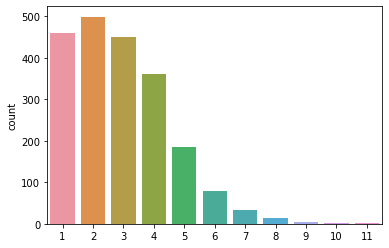

In [11]:
freq_genre=[]
for i in hbo_genre.Genre:
    if type(i)==list:
        freq_genre.append(len(i))
print(freq_genre[:10])    # first 10 elements from the list "freq_genre" 
sns.countplot(x=freq_genre)

Histogram of Size of each row list in the "hbo_genre" Dataframe. We can see that movies with one, two or three genres are more common than other movies with more than three grenres.

Converting elements of 'Genre' columne into list for using the pandas's 'explode' method.

In [12]:
explode_genre=hbo_genre.explode('Genre')
explode_genre.reset_index(inplace = True,drop = True)
explode_genre

,Genre
0,genres_Action_Adventure
1,genres_Drama
2,genres_Fantasy
3,genres_Romance
4,genres_Science_Fiction
...,...
6049,
6050,
6051,
6052,


In [13]:
explode_genre.Genre.isin(['',' ']).sum()

45

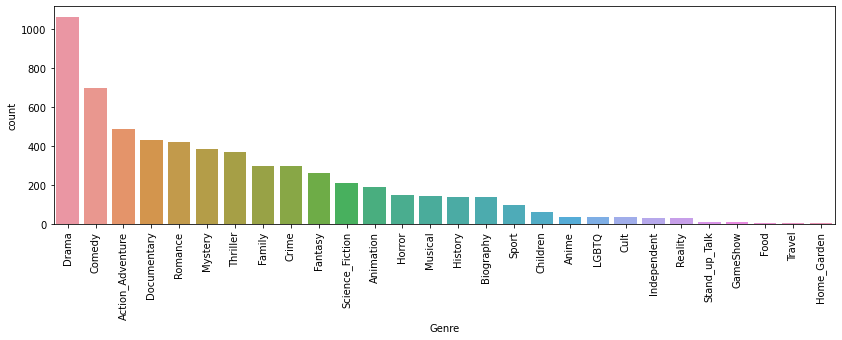

In [14]:
nan_value = float("NaN")
plt.figure(figsize=(14,4))
explode_genre['Genre']=explode_genre['Genre'].str.replace('genres_','')
explode_genre['Genre']=explode_genre['Genre'].str.replace(' ','')
explode_genre['Genre'].replace("", nan_value, inplace=True)
explode_genre.dropna(subset = ["Genre"], inplace=True)
sns.countplot(x=explode_genre['Genre'],order=explode_genre['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Platforms

Descending Order of genre count in the dataframe . We can see that 'Drama' is the most common genre as individual or in group with others.

In [15]:
platform=[]
for col in hbo.columns:
    if 'platforms_' in col:
        platform.append(col)
print(platform)

['platforms_acorntv', 'platforms_adult_swim_tveverywhere', 'platforms_amazon_prime', 'platforms_amc', 'platforms_amc_premiere', 'platforms_bbc_america_tve', 'platforms_britbox', 'platforms_cartoon_network', 'platforms_cbs_all_access', 'platforms_cinemax', 'platforms_comedycentral_tveverywhere', 'platforms_criterion_channel', 'platforms_crunchyroll_premium', 'platforms_curiositystream', 'platforms_dc_universe', 'platforms_epix', 'platforms_fandor', 'platforms_free', 'platforms_fubo_tv', 'platforms_funimation', 'platforms_hbo', 'platforms_hbo_max', 'platforms_hoopla', 'platforms_hulu_plus', 'platforms_kanopy', 'platforms_nbc_tveverywhere', 'platforms_netflix', 'platforms_shoutfactorytv', 'platforms_showtime', 'platforms_shudder', 'platforms_starz', 'platforms_sundancenow', 'platforms_syfy_tveverywhere', 'platforms_tbs', 'platforms_tnt', 'platforms_trutv_tveverywhere', 'platforms_urbanmoviechannel', 'platforms_velocity_go', 'platforms_watch_tcm']


In [16]:
hbo_plat=hbo[platform]
hbo_plat=hbo_plat.apply(lambda row: ', '.join([col for col, b in zip(hbo_plat.columns, row) if b]), axis=1).reset_index()
hbo_plat.rename(columns = {0:'Platform'}, inplace = True)
hbo_plat.head()

,index,Platform
0,0,"platforms_hbo, platforms_hbo_max"
1,1,"platforms_adult_swim_tveverywhere, platforms_f..."
2,2,platforms_hbo_max
3,3,"platforms_hbo, platforms_hbo_max"
4,4,platforms_hbo_max


In [17]:
hbo_plat.drop('index',axis=1,inplace=True)
hbo_plat['Platform']=hbo_plat['Platform'].str.split(',')
hbo_plat

,Platform
0,"[platforms_hbo, platforms_hbo_max]"
1,"[platforms_adult_swim_tveverywhere, platforms..."
2,[platforms_hbo_max]
3,"[platforms_hbo, platforms_hbo_max]"
4,[platforms_hbo_max]
...,...
2082,"[platforms_curiositystream, platforms_hbo_max]"
2083,"[platforms_curiositystream, platforms_hbo_max]"
2084,"[platforms_hbo, platforms_hbo_max]"
2085,"[platforms_curiositystream, platforms_hbo_max]"


[2, 5, 1, 2, 1, 1, 1, 2, 2, 4]


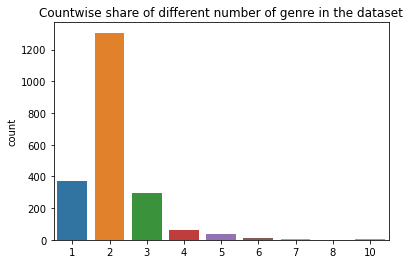

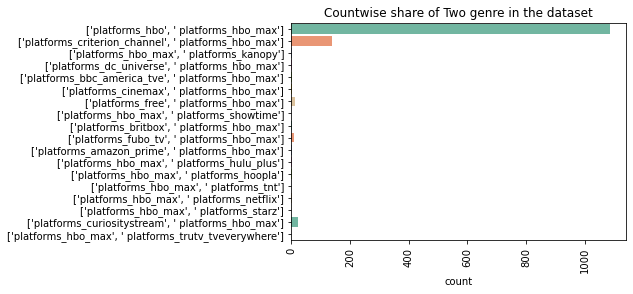

In [18]:
freq_plat=[]
freq2_plat=[]
for i in hbo_plat.Platform:
    if type(i)==list:
        freq_plat.append(len(i))
        if len(i)==2:
            freq2_plat.append(str(i))
print(freq_plat[:10])    # first 10 elements from the list "freq_genre" 
plt.title('Countwise share of different number of genre in the dataset')
sns.countplot(x=freq_plat)
plt.show()
plt.title('Countwise share of Two genre in the dataset')
sns.countplot(y=freq2_plat,palette = "Set2")
plt.xticks(rotation=90)
plt.show()

From above graph we can see that 'platform_hbo' and 'plaform_hbo_max'(as pair) has more share in platformwise(which is obvious). I draw the second graph because the first graph shows that most of the content is available on two platforms.

In [19]:
hbo_plat=hbo_plat.explode('Platform')
explode_genre.reset_index(inplace = True,drop = True)
hbo_plat

,Platform
0,platforms_hbo
0,platforms_hbo_max
1,platforms_adult_swim_tveverywhere
1,platforms_free
1,platforms_fubo_tv
...,...
2084,platforms_hbo_max
2085,platforms_curiositystream
2085,platforms_hbo_max
2086,platforms_curiositystream


In [20]:
hbo_plat['Platform']=hbo_plat['Platform'].str.replace('platforms_','')
hbo_plat['Platform']=hbo_plat['Platform'].str.replace(' ','')

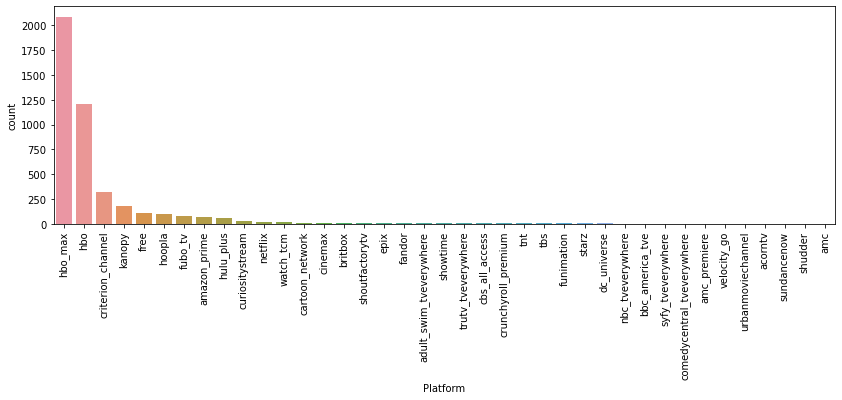

In [21]:
plt.figure(figsize=(14,4))
sns.countplot(x=hbo_plat['Platform'],order=hbo_plat['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

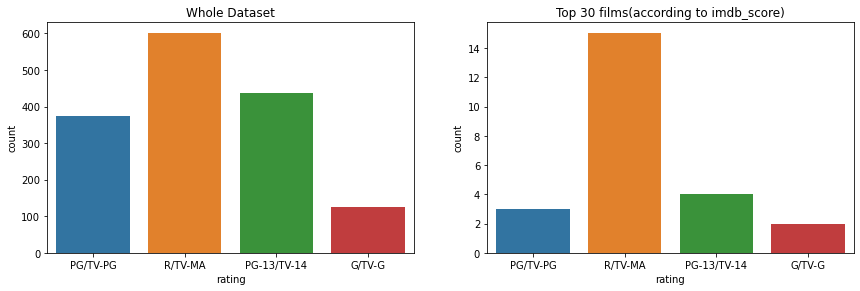

In [22]:
plt.figure(figsize=(14,4))
hbo_all=hbo.sort_values('imdb_score',ascending=False).iloc[:,:]
plt.subplot(1, 2, 1)
plt.title('Whole Dataset')
sns.countplot(x=hbo_all.rating)

hbo_30=hbo.sort_values('imdb_score',ascending=False).iloc[:30,:]
plt.subplot(1, 2, 2)
plt.title('Top 30 films(according to imdb_score)')
sns.countplot(x=hbo_30.rating)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,top=0.9,wspace=0.2,hspace=0.4)

R/TV-MA - This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.

PG/TV-PG - This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended.

G/TV-G - This program is suitable for all ages.

PG-13/TV-14 - This program may be unsuitable for children under 14 years of age.

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

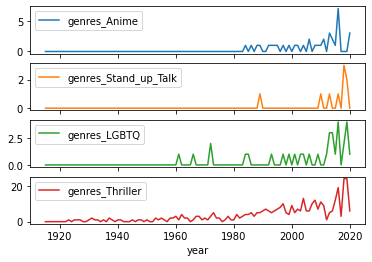

In [23]:
hbo[['genres_Anime','genres_Stand_up_Talk','genres_LGBTQ','genres_Thriller','year']].groupby('year').agg(sum).plot.line(subplots=True)

<AxesSubplot:xlabel='year'>

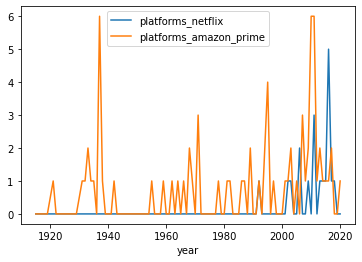

In [24]:
hbo[['platforms_netflix','platforms_amazon_prime','year']].groupby('year').agg(sum).plot.line()

This graph shows that amazon_prime has added(or we can say invested) more movies from the very past than netflix has added

The year shows the launch year of the movie ,not when it is added.

Text(0.5, 1.0, 'Empirical Cummulative distribution function')

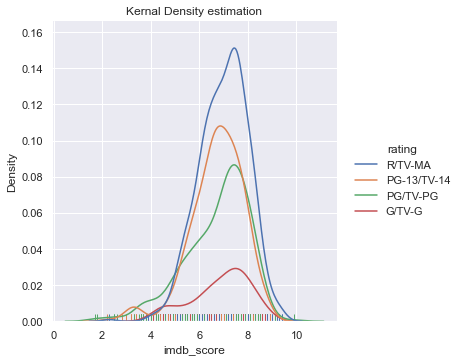

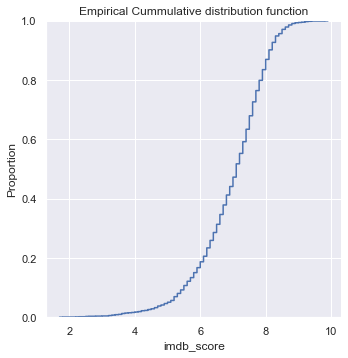

In [25]:
sns.set()
sns.displot(data=hbo,x='imdb_score',kind='kde',rug=True,hue='rating')
plt.title('Kernal Density estimation')
sns.displot(data=hbo,x='imdb_score',kind='ecdf')
plt.title('Empirical Cummulative distribution function')

In kde, we have to calculate the area under the graph between two points to get the proportion/probability of occurence of a number between that range(two numbers).

From two graphs we can see that more movies have imdb_score between 6 and 8 (because more area under the curve for kde and higher gradient(means higher density of data points, and if it seems flat which is from 2 to 4 and 9 to 10 ,then density of data points are low) for graph ecdf

We use ecdf to calculate the proportion upto a specific number. for example-

In [26]:
print(hbo.imdb_score.isna().sum())    # 62 na values the imdb_score feature
len(hbo[hbo.imdb_score<=6])/(len(hbo)-62)  # here the specific value is 6, whick means proportion upto 6 ,whick is 18.7160%

62


0.1871604938271605

In [27]:
hbo.type.value_counts()     # 1712 value are na in 'type' column

TV    375
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

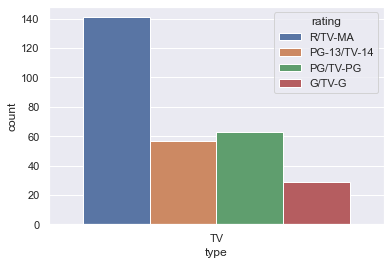

In [28]:
sns.countplot(data=hbo,x='type',hue='rating')